In [3]:
class SimpleClass():
    
    def __init__(self, name):
        
        print("helllo " + name)
        
    def yell(self):
        
        print("yellig")

In [5]:
x = SimpleClass("Claire")

helllo Claire


In [6]:
x.yell()

yellig


In [7]:
class ExtendClass(SimpleClass):
    
    def __init__(self):
        
        super().__init__("Underwood")
        
        print("Extending")

In [8]:
y = ExtendClass()

helllo Underwood
Extending


In [9]:
y.yell()

yellig


## OPERATION
 

In [10]:
class Operation():
    
    def __init__(self , input_nodes = []):
        
        self.input_nodes = input_nodes
        
        self.output_nodes = []
        
        
        for node in input_nodes:
            
            node.output_nodes.append(self)
            
    def Compute(self):
        
        pass

In [55]:
class add(Operation):
    
    def __init__(self , x , y):
        
        super().__init__([x , y])
        
    def compute(self , x_var , y_var):
        
        self.inputs = [x_var , y_var]
        
        return x_var + y_var

In [56]:
class multiply(Operation):
    
    def __init__(self , x , y):
        
        super().__init__([x , y])
        
    def compute(self , x_var , y_var):
        
        self.inputs = [x_var , y_var]
        
        return x_var * y_var

In [77]:
class matmul(Operation):
    
    def __init__(self , x ,y):
        
        super().__init__([x , y])
        
    def compute(self , x_var ,y_var):
        
        self.inputs = [x_var , y_var]
        
        return x_var.dot(y_var)

In [78]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [79]:
class Variable():
    
    def __init__(self , initial_value = None):
        
        self.value = initial_value
        
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [80]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        
        _default_graph =self

## Ax + b

## A = 10

## b = 1

## z=10x+1

In [81]:
g = Graph()

In [82]:
g.set_as_default()

In [83]:
A = Variable(10)

In [84]:
b = Variable(1)

In [85]:
x = Placeholder()

In [86]:
y = multiply(A , x)

In [87]:
z = add(y , b)

In [88]:
z

In [89]:
def traverse_postorder(operation):
    
    nodes_postorder = []
    
    def recurse(node):
        
        if isinstance(node , Operation):
            
            for input_node in node.input_nodes:
                
                recurse(input_node)
                
        nodes_postorder.append(node)
        
    recurse(operation)
    
    return nodes_postorder

In [90]:
import numpy as np

class Session():
    
    def run(self , operation , feed_dict = {}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else:
                 node.inputs = [input_node.output for input_node in node.input_nodes]
                
                 node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                 node.output = np.array(node.output)
                
        return operation.output

    

In [91]:
sess = Session()

In [92]:
result = sess.run(operation=z , feed_dict = {x:10})

In [93]:
result

101

In [94]:
g = Graph()

g.set_as_default()


A = Variable([[10,20],[30,40]])
b=Variable([1,2,])

x = Placeholder()

y = matmul(A,x)

z = add(y,b)


In [95]:
sess = Session()

In [96]:
sess.run(operation=z,feed_dict = {x:10})

array([[101, 202],
       [301, 402]])

In [98]:
import matplotlib.pyplot as plt

%matplotlib inline

In [160]:
def RelU(z):
    return 2*(1 / (1 + z**3))

In [161]:
sample_z = np.linspace(0,100,100)
sample_a = RelU(sample_z)

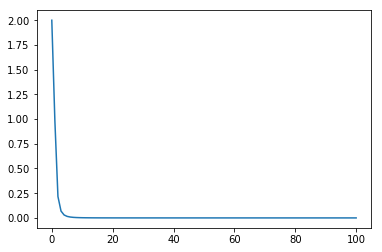

In [162]:
plt.plot(sample_z,sample_a)